# Learning Outcomes

- Understand time series applications to NumPy and Pandas.

- Summarize a dataframe with a datetime index.

- Generate simple time series plots.

In [1]:
import pandas as pd
import numpy as np

C:\Users\anirb\AppData\Local\Temp\ipykernel_22460\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Read the Source
df = pd.read_excel('../Sample - Superstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
# Simplify the Dataset
# Group DataFrame using a mapper or by a Series of columns

'''
A group by operation involves some combination of splitting
the object, applying a function, and combining the results.
This can be used to group large amounts of data and compute
operations
'''

variables = ['Order Date', 'Category', 'Sales']
group_variables = variables[:2]
output_variables = variables[-1]
base = df.groupby(group_variables)[output_variables].sum().reset_index()

In [5]:
base.head()

,Order Date,Category,Sales
0,2011-01-04,Office Supplies,16.448
1,2011-01-05,Office Supplies,288.060
2,2011-01-06,Office Supplies,19.536
3,2011-01-07,Furniture,2573.820
4,2011-01-07,Office Supplies,685.340


In [6]:
print("Columns:", base.columns)
print("Indexes:", base.index)

Columns: Index(['Order Date', 'Category', 'Sales'], dtype='object')
Indexes: RangeIndex(start=0, stop=2864, step=1)


In [7]:
base.dtypes

Order Date    datetime64[ns]
Category              object
Sales                float64
dtype: object

In [8]:
## Working with Numpy Arrays

order_date_data = np.array(base["Order Date"])
cateogry_data = np.array(base["Category"])
sales_data = np.array(base["Sales"])

In [9]:
print("Order Date type ", order_date_data.dtype)
print("Category type ", cateogry_data.dtype)
print("Sales type ", sales_data.dtype)

Order Date type  datetime64[ns]
Category type  object
Sales type  float64


In [10]:
base_df_from_numpy = pd.DataFrame({"Order Date": order_date_data, "Category": cateogry_data, "Sales": sales_data})

In [11]:
base_df_from_numpy.dtypes

Order Date    datetime64[ns]
Category              object
Sales                float64
dtype: object

## datetime64 format in numpy

In [12]:
order_date_data

array(['2011-01-04T00:00:00.000000000', '2011-01-05T00:00:00.000000000',
       '2011-01-06T00:00:00.000000000', ...,
       '2014-12-31T00:00:00.000000000', '2014-12-31T00:00:00.000000000',
       '2014-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [13]:
order_date_daily_data = np.array(order_date_data, dtype='datetime64[D]')

In [14]:
order_date_daily_data

array(['2011-01-04', '2011-01-05', '2011-01-06', ..., '2014-12-31',
       '2014-12-31', '2014-12-31'], dtype='datetime64[D]')

In [15]:
order_date_monthly_data = np.array(order_date_data, dtype="datetime64[M]")
order_date_monthly_data

array(['2011-01', '2011-01', '2011-01', ..., '2014-12', '2014-12',
       '2014-12'], dtype='datetime64[M]')

In [16]:
np.unique(order_date_monthly_data)

array(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12'],
      dtype='datetime64[M]')

In [17]:
len(np.unique(order_date_monthly_data))

48

In [18]:
len(np.unique(order_date_daily_data))

1238

## Working with Pandas DateTime Index

### Setting Index Using Existing Variable

We often want to set explicit index for TimeSerie Data. The Pandas DateTimeIndex is useful here, although it is used to stnadardize the index by ensuring all relevant periods are included once.

This data violate conditions due to reasons:-

- Multiple values for a given period (due to multiple categories).
- Missing days (for daily day).

In [19]:
base.set_index('Order Date', inplace=True)

In [20]:
base.head()

,Category,Sales
Order Date,,
2011-01-04,Office Supplies,16.448
2011-01-05,Office Supplies,288.060
2011-01-06,Office Supplies,19.536
2011-01-07,Furniture,2573.820
2011-01-07,Office Supplies,685.340


In [21]:
print(base.index)

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-07', '2011-01-07', '2011-01-08', '2011-01-08',
               '2011-01-10', '2011-01-10',
               ...
               '2014-12-28', '2014-12-29', '2014-12-29', '2014-12-29',
               '2014-12-30', '2014-12-30', '2014-12-30', '2014-12-31',
               '2014-12-31', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=2864, freq=None)


### Subsetting Data

We now have a Datetimeindex and we can use it to select data subsets.

In [22]:
base.index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-07', '2011-01-07', '2011-01-08', '2011-01-08',
               '2011-01-10', '2011-01-10',
               ...
               '2014-12-28', '2014-12-29', '2014-12-29', '2014-12-29',
               '2014-12-30', '2014-12-30', '2014-12-30', '2014-12-31',
               '2014-12-31', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=2864, freq=None)

In [23]:
# Observations in 2014
print(base.loc["2011"].head())
print("\n")
# Observations in a range of dates, subsets of columns
print(base[base["Category"] == "Office Supplies"].loc['2011': '2012-02'])

                   Category     Sales
Order Date                           
2011-01-04  Office Supplies    16.448
2011-01-05  Office Supplies   288.060
2011-01-06  Office Supplies    19.536
2011-01-07        Furniture  2573.820
2011-01-07  Office Supplies   685.340


                   Category    Sales
Order Date                          
2011-01-04  Office Supplies   16.448
2011-01-05  Office Supplies  288.060
2011-01-06  Office Supplies   19.536
2011-01-07  Office Supplies  685.340
2011-01-08  Office Supplies   10.430
...                     ...      ...
2012-02-22  Office Supplies   79.360
2012-02-23  Office Supplies   37.776
2012-02-25  Office Supplies   25.870
2012-02-27  Office Supplies   20.451
2012-02-29  Office Supplies   58.720

[304 rows x 2 columns]


In [24]:
print("Day:", base.index.day, '\n')
print("Week:", base.index.day_of_week, '\n')
base["DayofWeek"] = base.index.day_of_week
print(base.head())
del(base['DayofWeek'])

Day: Index([ 4,  5,  6,  7,  7,  7,  8,  8, 10, 10,
       ...
       28, 29, 29, 29, 30, 30, 30, 31, 31, 31],
      dtype='int32', name='Order Date', length=2864) 

Week: Index([1, 2, 3, 4, 4, 4, 5, 5, 0, 0,
       ...
       6, 0, 0, 0, 1, 1, 1, 2, 2, 2],
      dtype='int32', name='Order Date', length=2864) 

                   Category     Sales  DayofWeek
Order Date                                      
2011-01-04  Office Supplies    16.448          1
2011-01-05  Office Supplies   288.060          2
2011-01-06  Office Supplies    19.536          3
2011-01-07        Furniture  2573.820          4
2011-01-07  Office Supplies   685.340          4


## Standardizing the DatetimeIndex

### Pivoting Data

Because there are multiple categories, we have multiple Time Series to analyze. As a result, our Datetimeindex does not uniquely idenitfy an observation. To uniquely identify observations, we can either add categorical variables to the Index, or set a Pandas DateTimeIndex with separate columns for each series. There are several ways to accomplish this. The first approach uses Pandas built-in pivot method.

In [25]:
base.reset_index(inplace=True)

sales = base.pivot(index="Order Date", columns=["Category"], values=["Sales"]).fillna(0)
sales.head()

Sales                           
Category   Furniture Office Supplies Technology
Order Date                                     
2011-01-04     0.000          16.448       0.00
2011-01-05     0.000         288.060       0.00
2011-01-06     0.000          19.536       0.00
2011-01-07  2573.820         685.340    1147.94
2011-01-08    76.728          10.430       0.00

In [26]:
print("No. of unique dates ", len(sales.index.unique()))

No. of unique dates  1238


In [27]:
new_index = pd.date_range(sales.index.min(), sales.index.max())

In [28]:
sales = sales.reindex(index=new_index, fill_value=0)

In [29]:
sales.head()

Sales                           
Category   Furniture Office Supplies Technology
2011-01-04     0.000          16.448       0.00
2011-01-05     0.000         288.060       0.00
2011-01-06     0.000          19.536       0.00
2011-01-07  2573.820         685.340    1147.94
2011-01-08    76.728          10.430       0.00

In [30]:
sales.index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1458, freq='D')

In [31]:
#Downsampling  of time series data
# It is the decreasing no. of samples in the dataset

sales_week = sales.resample("W").sum()
print("Week Sales")
print(sales_week.head())

sales_monthly = sales.resample("ME").sum()
print("Monthly Sales")
print(sales_monthly.head())

sales_quaterly = sales.resample("QE").sum()
print("Quaterly Sales")
print(sales_quaterly.head())

Week Sales
               Sales                           
Category   Furniture Office Supplies Technology
2011-01-09  2650.548        1019.814    1147.94
2011-01-16  1003.779        2039.350     827.89
2011-01-23  1747.332         871.078     824.13
2011-01-30   550.200         680.338     343.33
2011-02-06   290.666         502.682     649.86
Monthly Sales
                Sales                           
Category    Furniture Office Supplies Technology
2011-01-31   5951.859        4851.080   3143.290
2011-02-28   2130.324        1071.724   1608.510
2011-03-31  14573.956        8605.879  32511.174
2011-04-30   7944.837       11155.074   9195.434
2011-05-31   6912.787        7135.624   9599.876
Quaterly Sales
                 Sales                           
Category     Furniture Office Supplies Technology
2011-03-31  22656.1390       14528.683  37262.974
2011-06-30  28063.7496       31243.735  27231.275
2011-09-30  41957.8783       53923.968  47751.366
2011-12-31  64515.0862       52

In [32]:
#Upsampling
# It is the decrease in the no. of samples in the dataset.
sales_yearly = sales.resample("YE").sum()
sales_monthly_from_anual = sales_yearly.resample("ME")

In [33]:
sales_monthly_from_anual.interpolate(method='spline', order=2).head(13)

Sales                               
Category        Furniture Office Supplies     Technology
2011-12-31  157192.853100   151776.412000  175278.233000
2012-01-31  157559.023085   147893.777321  170668.686543
2012-02-29  158029.690391   144706.151981  166951.869325
2012-03-31  158669.328838   141773.417625  163614.670969
2012-04-30  159422.643317   139402.357926  161010.817979
2012-05-31  160339.854794   137434.902237  158966.720158
2012-06-30  161361.788334   135997.983185  157614.254783
2012-07-31  162556.572841   134995.806165  156863.257496
2012-08-31  163892.419052   134484.180600  156769.409662
2012-09-30  165319.482980   134456.129408  157304.282985
2012-10-31  166932.902221   134909.782511  158503.535686
2012-11-30  168628.585211   135815.871967  160289.796623
2012-12-31  170518.237000   137233.463000  162780.809000

In [34]:
# Variable Transformations

'''
For Time Series Models, we want to use transformed variables (log, difference, growth rate, etc)
'''

# Variable First difference
print("Monthly Sales Difference \n", sales_monthly.diff().head())

# Percentage Difference
print("Monthly Percentage Difference \n", sales_monthly.pct_change().head())

Monthly Sales Difference 
                 Sales                           
Category    Furniture Office Supplies Technology
2011-01-31        NaN             NaN        NaN
2011-02-28  -3821.535       -3779.356  -1534.780
2011-03-31  12443.632        7534.155  30902.664
2011-04-30  -6629.119        2549.195 -23315.740
2011-05-31  -1032.050       -4019.450    404.442
Monthly Percentage Difference 
                Sales                           
Category   Furniture Office Supplies Technology
2011-01-31       NaN             NaN        NaN
2011-02-28 -0.642074       -0.779075  -0.488272
2011-03-31  5.841192        7.029940  19.211981
2011-04-30 -0.454861        0.296216  -0.717161
2011-05-31 -0.129902       -0.360325   0.043983


In [35]:
sales_monthly_new = sales_monthly.join(sales_monthly.pct_change().add_suffix("_%_Change"))
sales_monthly_new.head()

Sales                                Sales_%_Change  \
Category    Furniture Office Supplies Technology Furniture_%_Change   
2011-01-31   5951.859        4851.080   3143.290                NaN   
2011-02-28   2130.324        1071.724   1608.510          -0.642074   
2011-03-31  14573.956        8605.879  32511.174           5.841192   
2011-04-30   7944.837       11155.074   9195.434          -0.454861   
2011-05-31   6912.787        7135.624   9599.876          -0.129902   

                                                         
Category   Office Supplies_%_Change Technology_%_Change  
2011-01-31                      NaN                 NaN  
2011-02-28                -0.779075           -0.488272  
2011-03-31                 7.029940           19.211981  
2011-04-30                 0.296216           -0.717161  
2011-05-31                -0.360325            0.043983

In [36]:
## Rolling and Moving Averages

'''
Use rolling and moving averages to analyze data for specific time series
and to spot trends in that data.
'''

# Here we calculate moving averages

window_size = 7
rolling_window = sales.rolling(window_size)
print("Moving Mean \n" , rolling_window.mean().dropna().head())
print("Moving STD \n", rolling_window.std().dropna().head())
print("Moving cummulative sum\n", sales.cumsum().dropna().head())

Moving Mean 
                  Sales                            
Category     Furniture Office Supplies  Technology
2011-01-10  378.649714      147.022571  168.448571
2011-01-11  386.069714      145.085714  168.448571
2011-01-12  387.489714      103.934286  168.448571
2011-01-13  387.489714      101.143429  168.448571
2011-01-14  145.506714      292.825714   96.848571
Moving STD 
                  Sales                            
Category     Furniture Office Supplies  Technology
2011-01-10  968.401375      258.910638  432.071606
2011-01-11  965.210303      260.098228  432.071606
2011-01-12  964.554750      256.469838  432.071606
2011-01-13  964.554750      257.644914  432.071606
2011-01-14  325.261682      764.763082  242.757955
Moving cummulative sum
                Sales                           
Category   Furniture Office Supplies Technology
2011-01-04     0.000          16.448       0.00
2011-01-05     0.000         304.508       0.00
2011-01-06     0.000         324.044       

<Axes: title={'center': 'Week Sales'}>

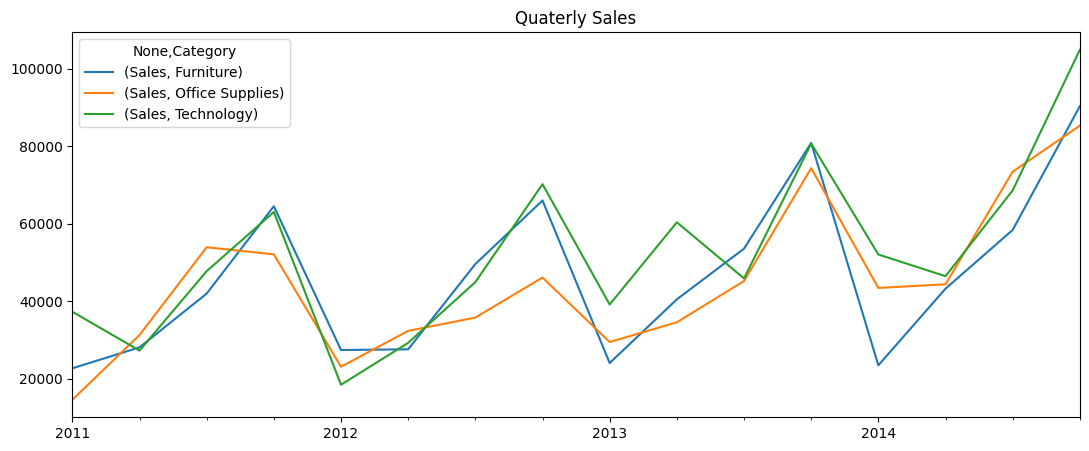

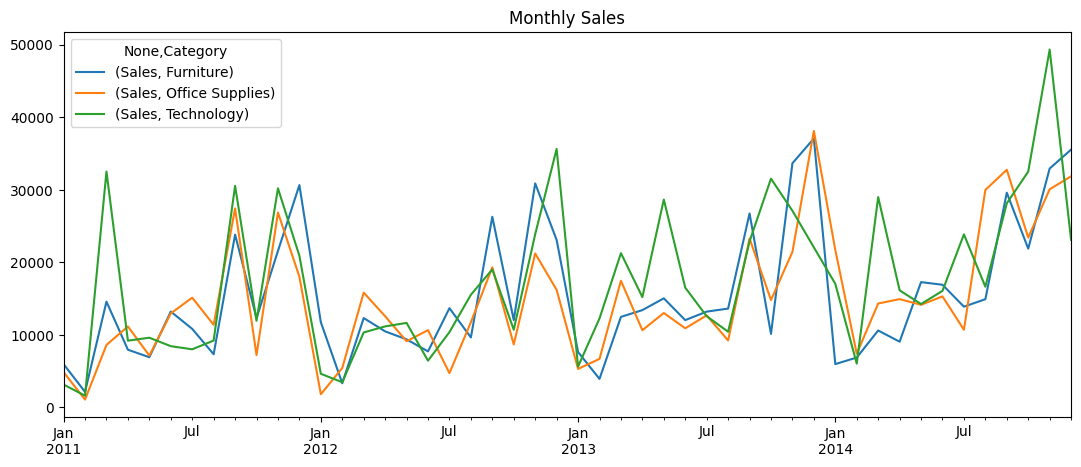

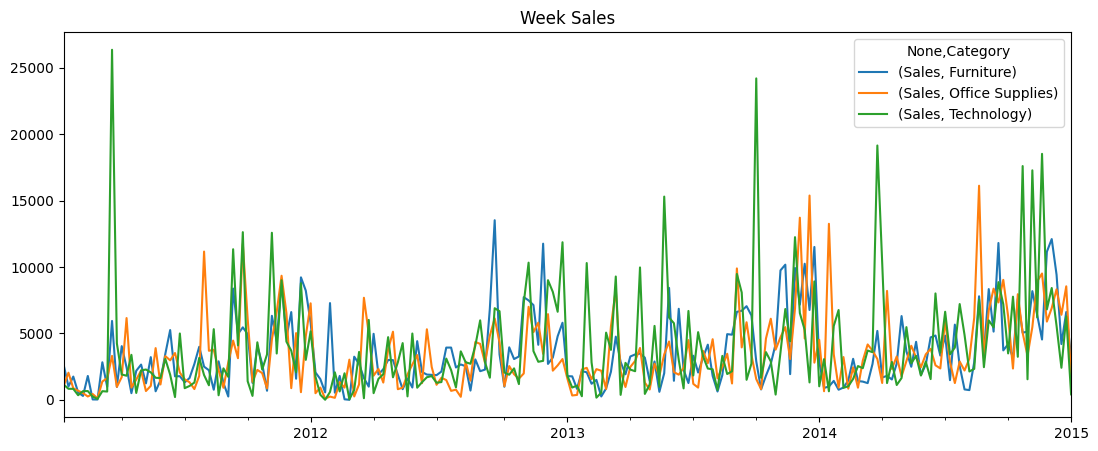

In [37]:
figsize = (13, 5)

sales_quaterly.plot(figsize=figsize, title="Quaterly Sales")

sales_monthly.plot(figsize=figsize, title="Monthly Sales")

sales_week.plot(figsize=figsize, title="Week Sales")

<Axes: title={'center': 'Cumulative Sum of Sales monthly'}>

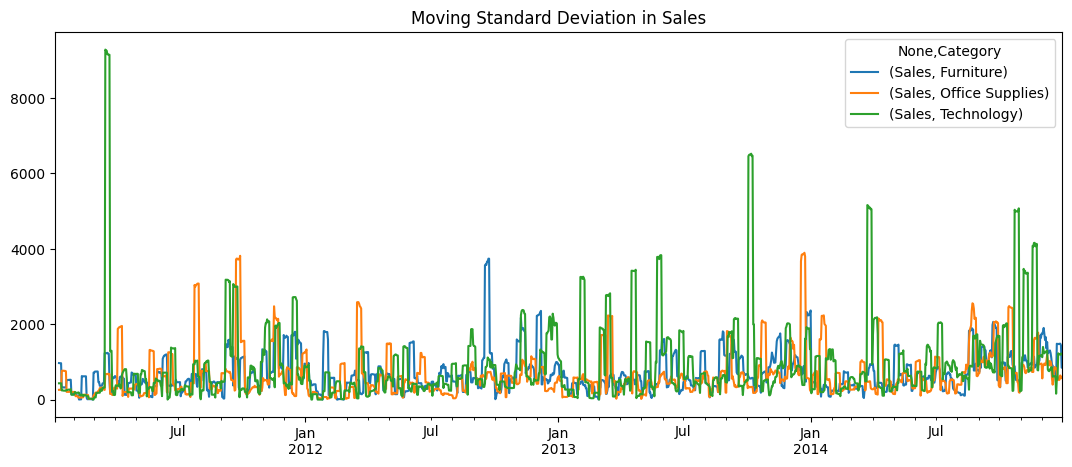

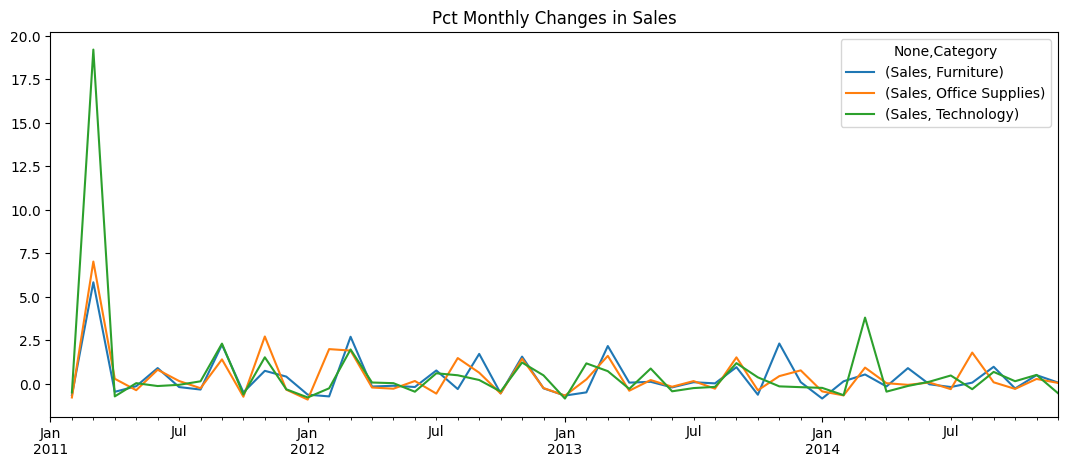

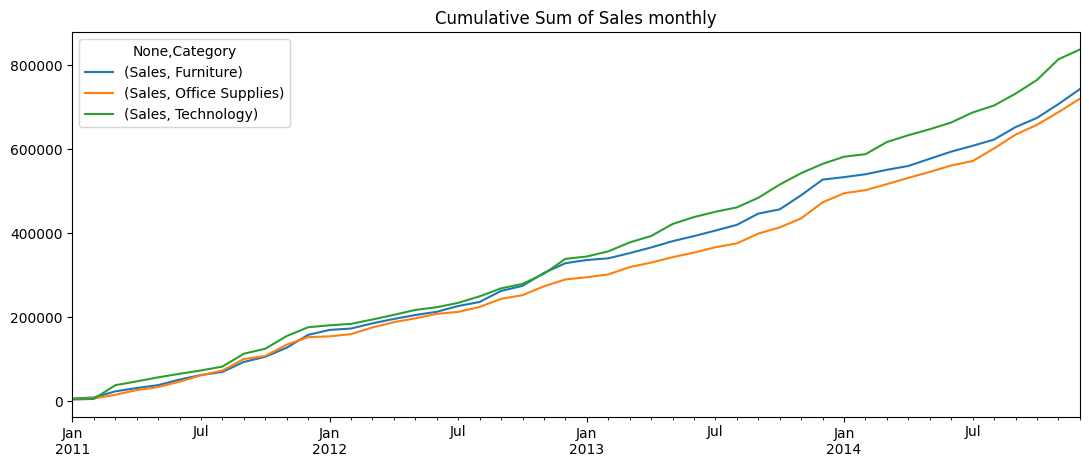

In [38]:
rolling_window.std().plot(figsize=figsize, title="Moving Standard Deviation in Sales")

sales_monthly.pct_change().plot(figsize=figsize, title="Pct Monthly Changes in Sales")

sales_monthly.cumsum().plot(figsize=figsize, title="Cumulative Sum of Sales monthly")

## Time Series Visualizations

There are a number of packages to help analyze Time Series data and create relevant plots. One of examples is statsmodels, which includes a number of methods plotting Time Series-specific visualizations:-

* plot_acf: Plot of autocorrelation function.
* plot_pacf: Plot of partial autocorrelation function.
* month_plot: Seasonal Plot for Monthly Data.
* quarter_plot: Seasonal Plot for Quaterly Data.

In [39]:
sales.head()

Sales                           
Category   Furniture Office Supplies Technology
2011-01-04     0.000          16.448       0.00
2011-01-05     0.000         288.060       0.00
2011-01-06     0.000          19.536       0.00
2011-01-07  2573.820         685.340    1147.94
2011-01-08    76.728          10.430       0.00

Daily data Autocorrelation Plots



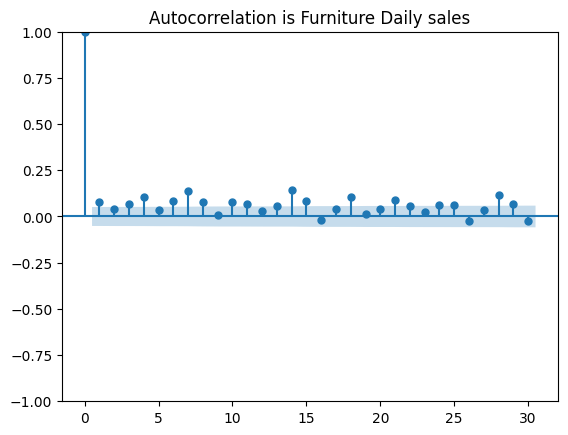

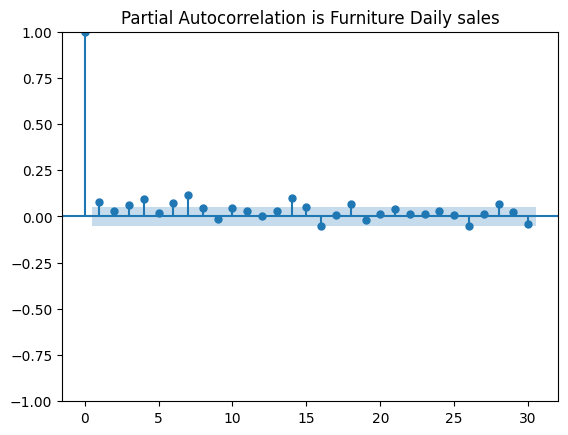

In [47]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,month_plot,quarter_plot

print("Daily data Autocorrelation Plots\n")

acf_plot = plot_acf(sales["Sales"]["Furniture"], lags=30, title="Autocorrelation is Furniture Daily sales")
pacf_plot = plot_pacf(sales["Sales"]["Furniture"], lags=30, title="Partial Autocorrelation is Furniture Daily sales")

Weekly data Autocorrelation Plots 



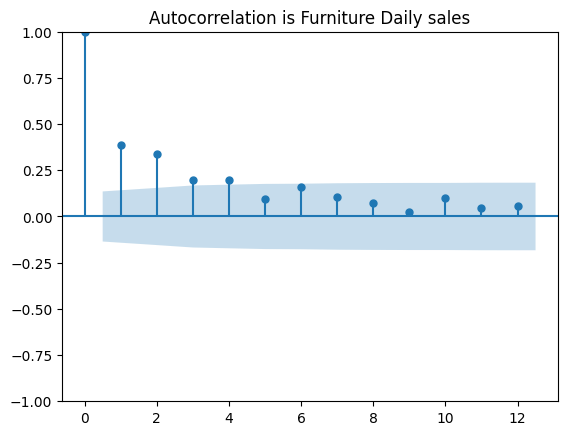

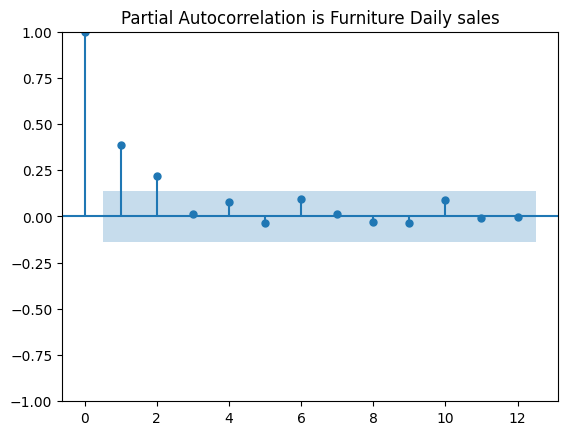

In [46]:
print("Weekly data Autocorrelation Plots \n")

acf_plot = plot_acf(sales_week["Sales"]["Furniture"], lags=12, title="Autocorrelation is Furniture Weekly sales")
pacf_plot = plot_pacf(sales_week["Sales"]["Furniture"], lags=12, title="Partial Autocorrelation is Furniture Weekly sales")

Montly Data Seasonal Plot 



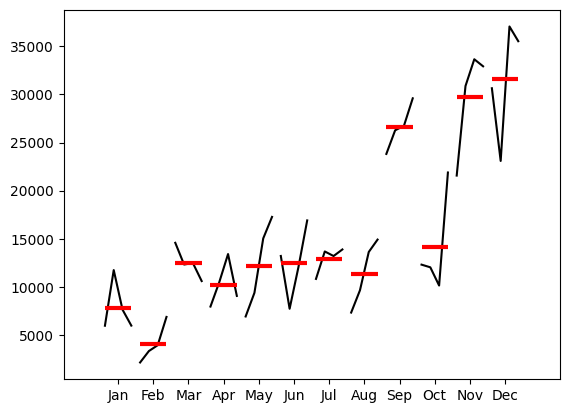

In [51]:
print("Montly Data Seasonal Plot \n")
mplot = month_plot(sales_monthly["Sales"]["Furniture"])

Quarterly sales data 



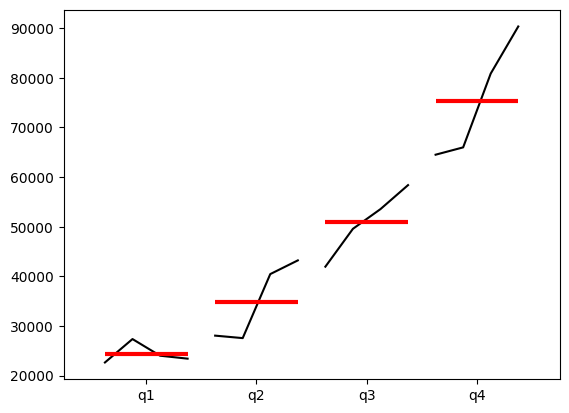

In [52]:
print("Quarterly sales data \n")
qplot = quarter_plot(sales_quaterly["Sales"]["Furniture"])

In [67]:
# Excersise 1
new_vars = ["Segment", "Profit", "Order Date", "Sales"]
new_base = df[new_vars].set_index("Order Date")
prof_year = new_base.pivot_table(columns=["Segment"], index="Order Date").fillna(0)
prof_month = prof_year.resample("ME").sum()
prof_month.head()

Profit                                Sales               \
Segment       Consumer   Corporate Home Office     Consumer    Corporate   
Order Date                                                                 
2011-01-31  106.509381    5.949690  185.009014  1304.136917   567.985000   
2011-02-28  228.275328  126.045233   37.850050  1442.712444   464.119667   
2011-03-31  -26.526640  131.273643   73.745998  3777.765327  1988.427996   
2011-04-30  336.913592  435.612748  527.880690  3752.783100  3951.192867   
2011-05-31  484.027619  872.956510  -63.328867  5373.213935  4077.715976   

                         
Segment     Home Office  
Order Date               
2011-01-31   855.947143  
2011-02-28   104.120000  
2011-03-31  4439.857500  
2011-04-30  2031.591533  
2011-05-31   696.092667

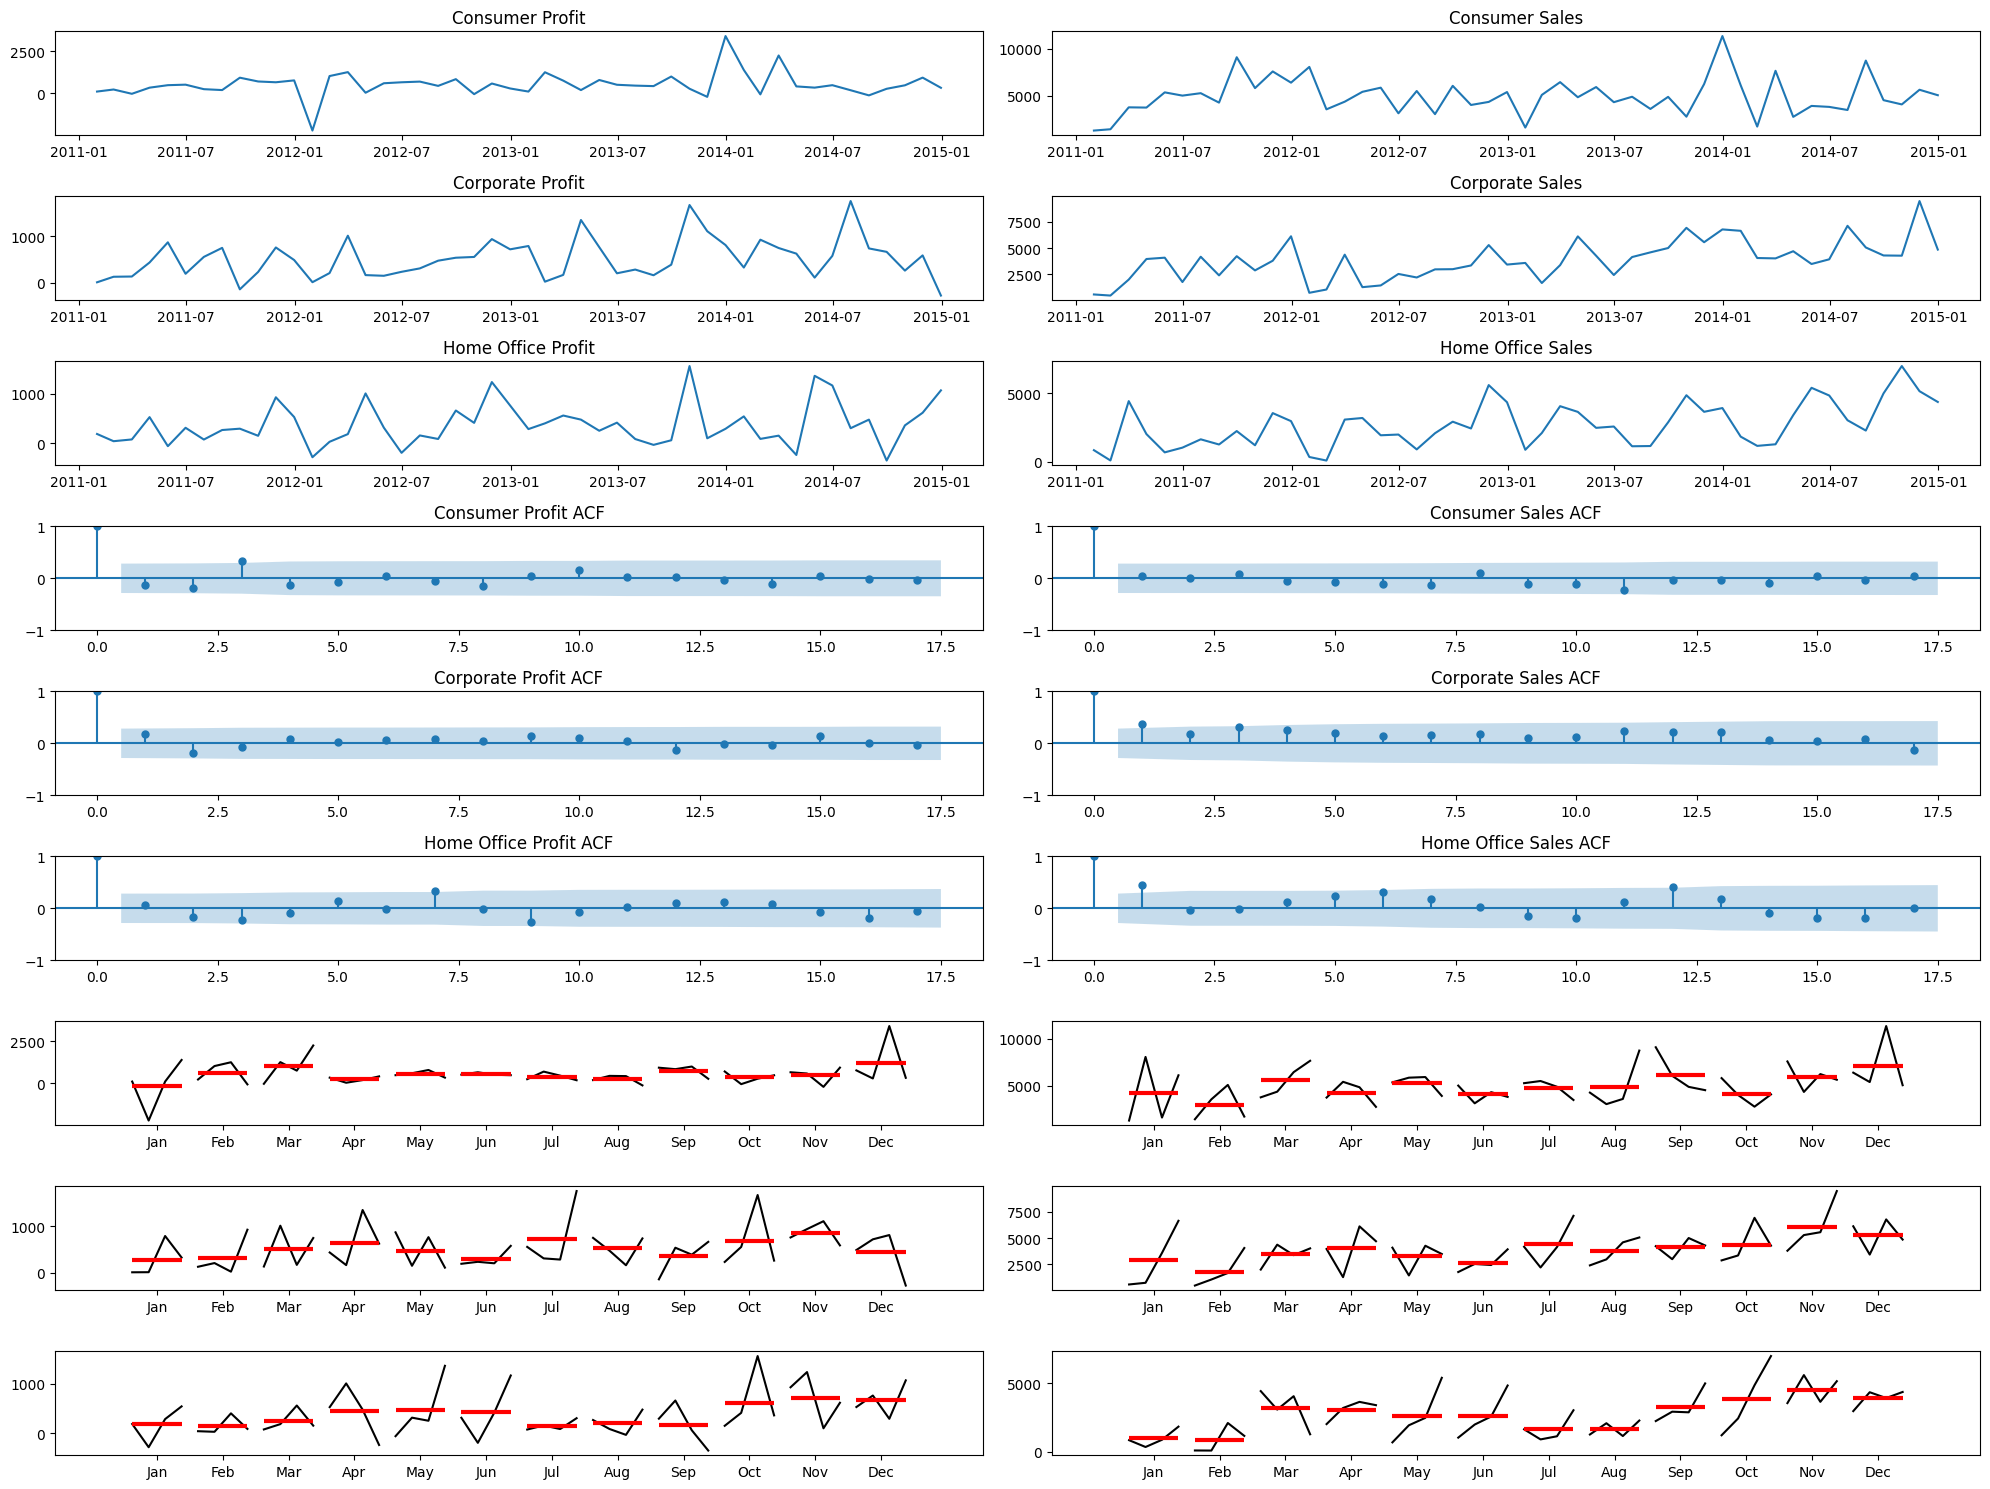

In [70]:
# Present Solutions
import matplotlib.pyplot as plt

fig, axes = plt.subplots(9,2, figsize=(20, 15))
for i,cat in enumerate(["Consumer", "Corporate", "Home Office"]):
    for j, money in enumerate(["Profit", "Sales"]):
        axes[i,j].plot(prof_month[money][cat])
        axes[i,j].title.set_text(cat + " " + money)
        acf = plot_acf(prof_month[money][cat], ax=axes[i + 3, j], title= cat + " " + money + " ACF")
        mplot = month_plot(prof_month[money][cat], ax=axes[i + 6, j])

fig.tight_layout()
plt.show()